# Basic Algorithm Assessment

We analyzed our data and saw that one of the classes was linearly separable from the others.
Also note that the data set is relatively small. 
A decision tree could provide a first pass model for the Iris data set.

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} graphviz

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

from sklearn import datasets

In [3]:
# Setup the data...
iris_dataset = datasets.load_iris()
X = iris_dataset.data
y = iris_dataset.target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Decision Trees are the building block for Random Forest classifiers.
On a data set of this size and complexity, it will serve us pretty well.

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# There are lots of hyperparameters here! We will mess with the splitting measure and process.
# Measure: gini or entropy, splitter: best or random
dt_full_clf = DecisionTreeClassifier(criterion='gini',splitter='best')
dt_full_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

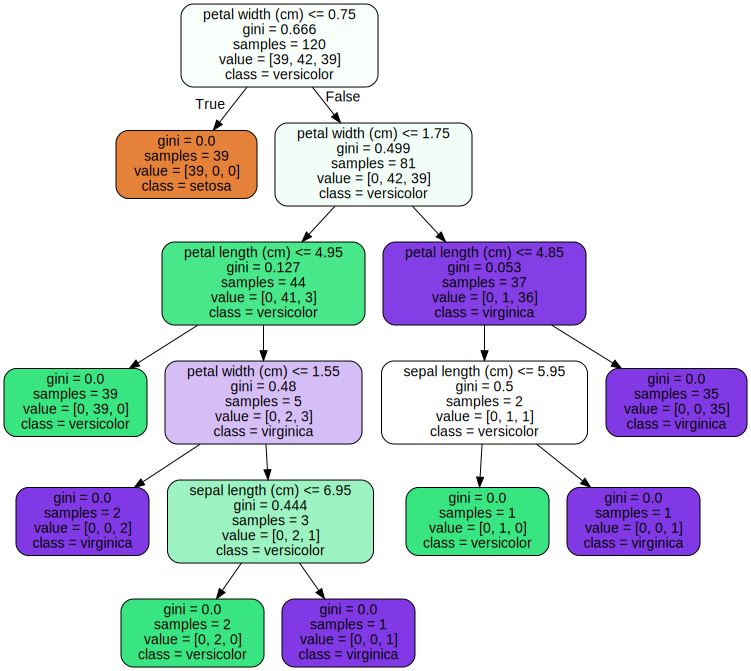

In [5]:
from graphviz import Graph, Source
graph_dot = export_graphviz(dt_full_clf, out_file=None, feature_names=iris_dataset.feature_names, \
                        class_names=iris_dataset.target_names, rounded=True, filled=True)
Source(graph_dot)

Now let's see this classifer's accuracy and it's "confusion matrix."

In [6]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred_train = dt_full_clf.predict(X_train)

accs =cross_val_score(dt_full_clf, X_train, y_train, cv=6, scoring='accuracy')
print("Cross-validated Accuracies: {0}".format(accs))


y_train_pred = cross_val_predict(dt_full_clf, X_train, y_train, cv=10)

confusion_matrix(y_train, y_train_pred)

Cross-validated Accuracies: [1.         0.95238095 0.95238095 0.94736842 0.94736842 0.94736842]


array([[39,  0,  0],
       [ 0, 39,  3],
       [ 0,  3, 36]])

Wow, looks pretty good!
Let us now try predicting over the **test** data.

In [7]:
y_test_pred = dt_full_clf.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 10]])

We achieved very good performance with a decision tree.
However, as our data sets get more complex, we will need to assess them with more tools.